In [1]:
import numpy as np
import pandas as pd
import random
from scipy.optimize import dual_annealing
import time
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import OptimizeResult

In [2]:
df_meta = pd.read_excel(r'C:\SwitchDrive\Data\Update_4\AG_meta_and_lab_20230710.xlsx')

In [3]:
df_iop_ = pd.read_csv(r'c:\SwitchDrive\Data\Update_4\iop_ml_dataset_only_triplets.csv')

In [35]:
df_iop_

,GLORIA_ID,Rrs_350,Rrs_351,Rrs_352,Rrs_353,Rrs_354,Rrs_355,Rrs_356,Rrs_357,Rrs_358,...,Rrs_897,Rrs_898,Rrs_899,Rrs_900,aCDOM_443,aCDOM_675,aNAP_443,aNAP_675,aph_443,aph_675
0,GID_70,0.000777,0.000767,0.000796,0.000829,0.000824,0.000858,0.000900,0.000979,0.001032,...,0.000820,0.000799,0.000762,0.000763,1.177645,0.017634,1.155448,0.171572,0.429139,0.320729
1,GID_72,0.002046,0.002056,0.002089,0.002141,0.002156,0.002194,0.002235,0.002293,0.002337,...,0.003446,0.003458,0.003398,0.003375,3.286975,0.071338,1.228935,0.178057,2.130495,1.345257
2,GID_73,0.000710,0.000704,0.000731,0.000761,0.000760,0.000790,0.000827,0.000890,0.000934,...,0.000992,0.000988,0.000963,0.000957,2.699423,0.035232,1.069016,0.128860,0.806638,0.536137
3,GID_74,0.000722,0.000715,0.000735,0.000758,0.000758,0.000782,0.000811,0.000863,0.000900,...,0.000817,0.000817,0.000802,0.000803,2.277003,0.010596,0.576587,0.076382,0.425114,0.300679
4,GID_75,0.000812,0.000806,0.000822,0.000843,0.000843,0.000863,0.000888,0.000932,0.000963,...,0.000412,0.000411,0.000402,0.000400,1.388777,0.014135,0.656945,0.080326,0.262239,0.224845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,AGID_2922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.414540,0.069090,0.420340,0.090161,0.504809,0.307788
2552,AGID_2923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.414540,0.069090,0.414890,0.086045,0.372461,0.231302
2553,AGID_2924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.437570,0.092120,0.422664,0.097788,0.429146,0.261521
2554,AGID_2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.437570,0.092120,0.512828,0.121846,0.457969,0.284133


In [4]:
df_split = df_meta.merge(df_iop_, 'left', on='GLORIA_ID').dropna(subset=['aph_443']).rename(columns={'Site_name':'lake_name'})

In [5]:
df_split

,GLORIA_ID,Organization_ID,Dataset_ID,Sample_ID,LIMNADES_ID,LIMNADES_UID,SeaBASS_ID,Data_collection_purpose,Special_event_flag,lake_name,...,Rrs_897,Rrs_898,Rrs_899,Rrs_900,aCDOM_443,aCDOM_675,aNAP_443,aNAP_675,aph_443,aph_675
69,GID_70,UT-TO,AlikasK_EE_UT-TO,822,NaN,NaN,NaN,3,NaN,Lake Tamula,...,0.000820,0.000799,0.000762,0.000763,1.177645,0.017634,1.155448,0.171572,0.429139,0.320729
71,GID_72,UT-TO,AlikasK_EE_UT-TO,837,NaN,NaN,NaN,3,NaN,Lake Peipsi,...,0.003446,0.003458,0.003398,0.003375,3.286975,0.071338,1.228935,0.178057,2.130495,1.345257
72,GID_73,UT-TO,AlikasK_EE_UT-TO,838,NaN,NaN,NaN,3,NaN,Lake Peipsi,...,0.000992,0.000988,0.000963,0.000957,2.699423,0.035232,1.069016,0.128860,0.806638,0.536137
73,GID_74,UT-TO,AlikasK_EE_UT-TO,839,NaN,NaN,NaN,3,NaN,Lake Peipsi,...,0.000817,0.000817,0.000802,0.000803,2.277003,0.010596,0.576587,0.076382,0.425114,0.300679
74,GID_75,UT-TO,AlikasK_EE_UT-TO,840,NaN,NaN,NaN,3,NaN,Lake Peipsi,...,0.000412,0.000411,0.000402,0.000400,1.388777,0.014135,0.656945,0.080326,0.262239,0.224845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,AGID_2922,Tsukuba,MatsushitaB_JP_Tsukuba,4,NaN,NaN,NaN,NaN,NaN,Suwa,...,NaN,NaN,NaN,NaN,0.414540,0.069090,0.420340,0.090161,0.504809,0.307788
9786,AGID_2923,Tsukuba,MatsushitaB_JP_Tsukuba,5,NaN,NaN,NaN,NaN,NaN,Suwa,...,NaN,NaN,NaN,NaN,0.414540,0.069090,0.414890,0.086045,0.372461,0.231302
9787,AGID_2924,Tsukuba,MatsushitaB_JP_Tsukuba,6,NaN,NaN,NaN,NaN,NaN,Suwa,...,NaN,NaN,NaN,NaN,0.437570,0.092120,0.422664,0.097788,0.429146,0.261521
9788,AGID_2925,Tsukuba,MatsushitaB_JP_Tsukuba,7,NaN,NaN,NaN,NaN,NaN,Suwa,...,NaN,NaN,NaN,NaN,0.437570,0.092120,0.512828,0.121846,0.457969,0.284133


In [6]:
# Assuming 'robust_df' is your DataFrame

# Define a function to apply to each row
def fill_site_name(row):
    if pd.isna(row['lake_name']):
        if not pd.isna(row['Dataset_ID']):
            return row['Dataset_ID']
        else:
            return row['Organization_ID']
    else:
        return row['lake_name']

# Apply the function to each row
df_split['lake_name'] = df_split.apply(fill_site_name, axis=1)

# This updates 'Site_name' in 'robust_df' based on your conditions


In [7]:
cd C:\SwitchDrive\Data\final_datasets

C:\SwitchDrive\Data\final_datasets


In [40]:
# for PRISMA SRF
#df_sel = df_split.loc[:, df_split.loc[:, 'Rrs_400':'Rrs_720'].columns.union(['GLORIA_ID'])]
#df_sel.to_csv('rrs_aug_gloria_for_prisma_srf.csv',index=False)

In [8]:
# Define columns
input_columns = [f'Rrs_{i}' for i in range(400, 705, 5)]  # Adjusted for 5 nm steps
output_columns = ['aCDOM_443', 'aCDOM_675', 'aNAP_443', 'aNAP_675', 'aph_443', 'aph_675']
auxiliary_columns = ['GLORIA_ID']

In [9]:
# Define columns to check after they were clipped in filtered_df
columns_to_check = [column for column in output_columns]
# Remove rows from new_df where any of the specified columns have values <= 0.000001, i.e. are negative
filtered_df = df_split[~(df_split[columns_to_check] <= 0.000001).any(axis=1)]


In [69]:
filtered_df.to_csv('filtered_df_2319.csv',index=False)

In [10]:
from sklearn.preprocessing import RobustScaler
from joblib import dump
from sklearn.model_selection import train_test_split

In [85]:
cd C:\SwitchDrive\Data\final_datasets\input_scalers

C:\SwitchDrive\Data\final_datasets\input_scalers


In [86]:
# Initialize the RobustScaler for Rrs
robust_scaler_input = RobustScaler()
# apply the scaler
filtered_df[input_columns] = robust_scaler_input.fit_transform(filtered_df[input_columns])
# save it 
dump(robust_scaler_input, 'input_scaler.joblib')

C:\Users\werthemo\AppData\Local\Temp\ipykernel_31300\4168926596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[input_columns] = robust_scaler_input.fit_transform(filtered_df[input_columns])


['input_scaler.joblib']

## 1. random splitting

- randomize and split in half

In [87]:
cd C:\SwitchDrive\Data\final_datasets\

C:\SwitchDrive\Data\final_datasets


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
# Randomize the DataFrame
randomized_df = filtered_df.sample(frac=1).reset_index(drop=True)

# Split the DataFrame into two parts
df1, df2 = train_test_split(randomized_df, test_size=0.5)

In [90]:
df1.to_csv(r'C:\SwitchDrive\Data\final_datasets\random_df_train_org.csv',index=False)
df2.to_csv(r'C:\SwitchDrive\Data\final_datasets\random_df_test_org.csv',index=False)

## 2. Within distribution split

In [102]:
def similarity_score(D1, D2):
    """Calculate the similarity score between two datasets."""
    return np.abs(D1[summary_cols].mean() - D2[summary_cols].mean()).sum()

def progress_callback(xk, fk, *args):
    """Callback function to print progress during optimization."""
    global iteration
    global best_obj_val
    max_iterations = args[0]
    
    iteration += 1
    
    if fk < best_obj_val:
        best_obj_val = fk
        print(f"Objective function value at iteration {iteration}: {fk}")

    if iteration >= max_iterations:
        return True

iteration = 0
best_obj_val = float("inf")

def objective(x, unique_lake_names, train_size, data):
    """Objective function for the optimization problem."""
    x_unique = np.unique(x.astype(int))
    train_lakes = unique_lake_names[x_unique]
    test_lakes = np.setdiff1d(unique_lake_names, train_lakes)

    D_train = data[data['lake_name'].isin(train_lakes)]
    D_test = data[data['lake_name'].isin(test_lakes)]

    balance_penalty = np.abs(len(D_train) - len(D_test))
    return similarity_score(D_train, D_test) + balance_penalty

def lake_data_split(data, train_ratio=0.5, seed=11, max_iterations=10):
    """
    Splits the dataset into train and test sets, ensuring that each set has unique lake names.
    
    The function uses dual_annealing optimization to find the best split of lake names between 
    train and test sets. The objective function measures the similarity between train and test 
    sets based on the summary columns and adds a penalty term for imbalance in the number of 
    observations between the sets. The dual_annealing algorithm is run for a specified number 
    of iterations to find the split that minimizes the objective function value.

    Parameters:
    data (pd.DataFrame): Input dataset to be split.
    train_ratio (float): Ratio of unique lake names to be assigned to the train set.
    seed (int): Random seed for reproducibility.
    max_iterations (int): Maximum number of iterations for the optimization algorithm.

    Returns:
    train_set (pd.DataFrame): Train set with unique lake names.
    test_set (pd.DataFrame): Test set with unique lake names.
    
    """
    np.random.seed(seed)
    unique_lake_names = data['lake_name'].unique()
    n_lakes = len(unique_lake_names)

    train_size = int(train_ratio * n_lakes)

    x0 = np.random.permutation(n_lakes)[:train_size]
    bounds = [(0, n_lakes - 1)] * train_size

    best_res = None
    best_obj_val = float("inf")

    for i in range(max_iterations):
        res = dual_annealing(objective, bounds, x0=x0, args=(unique_lake_names, train_size, data), seed=seed, callback=progress_callback)
        if res.fun < best_obj_val:
            best_res = res
            best_obj_val = res.fun
        x0 = best_res.x.astype(int)

    x_unique = np.unique(x0)
    optimal_train_lakes = unique_lake_names[x_unique]
    optimal_test_lakes = np.setdiff1d(unique_lake_names, optimal_train_lakes)

    train_set = data[data['lake_name'].isin(optimal_train_lakes)]
    test_set = data[data['lake_name'].isin(optimal_test_lakes)]

    return train_set, test_set

summary_cols = ['aph_443', 'aNAP_443', 'aCDOM_443']
train_set_wd, test_set_wd = lake_data_split(filtered_df, seed=43)

print(len(train_set_wd))
print(len(test_set_wd))


Objective function value at iteration 1: 57.670350714171164
Objective function value at iteration 2: 10.178415029242872
Objective function value at iteration 3: 1.3498391455822594
Objective function value at iteration 4: 1.2881248090537902
Objective function value at iteration 5: 1.244742922510305
Objective function value at iteration 6: 1.2306506282810081
Objective function value at iteration 7: 1.2000233801499411
Objective function value at iteration 8: 1.1989542594990628
Objective function value at iteration 9: 1.1972543720299782
Objective function value at iteration 10: 1.1788688657282826
1159
1160


In [112]:
def check_lake_name_uniqueness(train_set, test_set, lake_name_col='lake_name'):
    train_lake_names = set(train_set[lake_name_col])
    test_lake_names = set(test_set[lake_name_col])

    train_test_intersection = train_lake_names.intersection(test_lake_names)

    if not train_test_intersection:
        print("Lake names are unique in each dataset.")
        return True
    else:
        print("Lake names are not unique in each dataset.")
        if train_test_intersection:
            print(f"Common lake names in train and test sets: {train_test_intersection}")
        return False


In [113]:
train_lake_names = train_set_wd["lake_name"].unique()
test_lake_names = test_set_wd["lake_name"].unique()

common_lake_names = np.intersect1d(train_lake_names, test_lake_names)

print(f"Number of unique lake names in train set: {len(train_lake_names)}")
print(f"Number of unique lake names in test set: {len(test_lake_names)}")
print(f"Number of common lake names: {len(common_lake_names)}")


Number of unique lake names in train set: 68
Number of unique lake names in test set: 112
Number of common lake names: 0


In [114]:
unique_lake_names = check_lake_name_uniqueness(train_set_wd,test_set_wd)

Lake names are unique in each dataset.


In [115]:
# summary_cols are the columns we are interested in.
summary_cols = ['aph_443', 'aNAP_443', 'aCDOM_443']

# Calculate descriptive statistics for the training set
train_stats = train_set_wd[summary_cols].describe()

# Calculate descriptive statistics for the test set
test_stats = test_set_wd[summary_cols].describe()

# Calculate the absolute difference between the two
abs_difference = abs(train_stats - test_stats)

# Calculate the relative difference between the two
relative_difference = abs_difference / train_stats

# # Display the absolute and relative differences
print("\nAbsolute Difference in Statistics:")
print(abs_difference)
print("\nRelative Difference in Statistics:")
print(relative_difference)



Absolute Difference in Statistics:
         aph_443      aNAP_443  aCDOM_443
count   1.000000  1.000000e+00   1.000000
mean    0.132547  1.131388e-02   0.035008
std     1.482849  1.705716e-02   0.282837
min     0.001103  3.146160e-07   0.002283
25%     0.031283  3.821290e-02   0.090184
50%     0.004524  4.881643e-02   0.105272
75%     0.516086  1.240327e-01   0.136463
max    13.946458  2.441989e+00   2.509951

Relative Difference in Statistics:
        aph_443  aNAP_443  aCDOM_443
count  0.000863  0.000863   0.000863
mean   0.153553  0.020581   0.037981
std    0.542241  0.021049   0.227561
min    0.273053  0.000954   9.127492
25%    0.358384  0.621229   0.425312
50%    0.024709  0.227118   0.185076
75%    1.071826  0.180952   0.117881
max    0.369277  0.304785   0.188872


C:\Users\werthemo\AppData\Local\Temp\ipykernel_31300\2268928304.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_col_positive, label="Train", shade=True, alpha=0.5, ax=axes[idx])
C:\Users\werthemo\AppData\Local\Temp\ipykernel_31300\2268928304.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_col_positive, label="Test", shade=True, alpha=0.5, ax=axes[idx])
C:\Users\werthemo\AppData\Local\Temp\ipykernel_31300\2268928304.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_col_positive, label="Train", shade=True, alpha=0.5, ax=axes[idx])
C:\Users\werthemo\AppData\Local\Temp\ipykernel_31300\2268928304

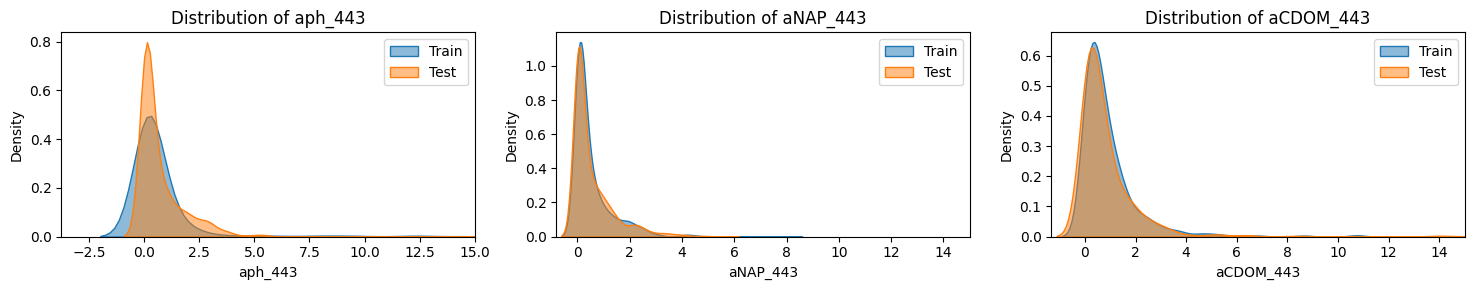

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distributions(train_set, test_set, columns, figsize=(5, 3), xlimits=None):
    fig, axes = plt.subplots(1, len(columns), figsize=(figsize[0] * len(columns), figsize[1]))

    if xlimits is None:
        xlimits = [None] * len(columns)

    for idx, col in enumerate(columns):
        # Filter out negative observations
        train_col_positive = train_set[col][train_set[col] >= 0]
        test_col_positive = test_set[col][test_set[col] >= 0]
        
        sns.kdeplot(train_col_positive, label="Train", shade=True, alpha=0.5, ax=axes[idx])
        sns.kdeplot(test_col_positive, label="Test", shade=True, alpha=0.5, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].legend()
        
        lower_limit = min(train_col_positive.min(), test_col_positive.min()) - 0.1 * (train_col_positive.max() - test_col_positive.min())
        
        if xlimits[idx] is not None:
            axes[idx].set_xlim(lower_limit, xlimits[idx])
    
    plt.tight_layout()
    plt.show()

columns = ['aph_443', 'aNAP_443', 'aCDOM_443']
xlimits = [15, 15, 15]
plot_distributions(train_set_wd, test_set_wd, columns, figsize=(5, 3), xlimits=xlimits)


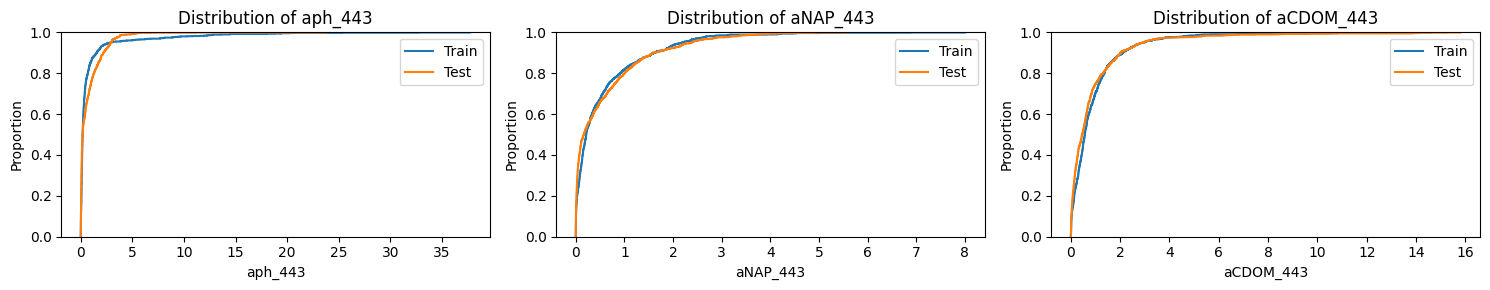

In [117]:
def plot_cdf(train_set, test_set, columns, figsize=(5, 3)):
    fig, axes = plt.subplots(1, len(columns), figsize=(figsize[0] * len(columns), figsize[1]))

    for idx, col in enumerate(columns):
        sns.ecdfplot(train_set[col], label="Train", ax=axes[idx])
        sns.ecdfplot(test_set[col], label="Test", ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()
    
columns = ['aph_443', 'aNAP_443', 'aCDOM_443']
plot_cdf(train_set_wd, test_set_wd, columns, figsize=(5, 3))

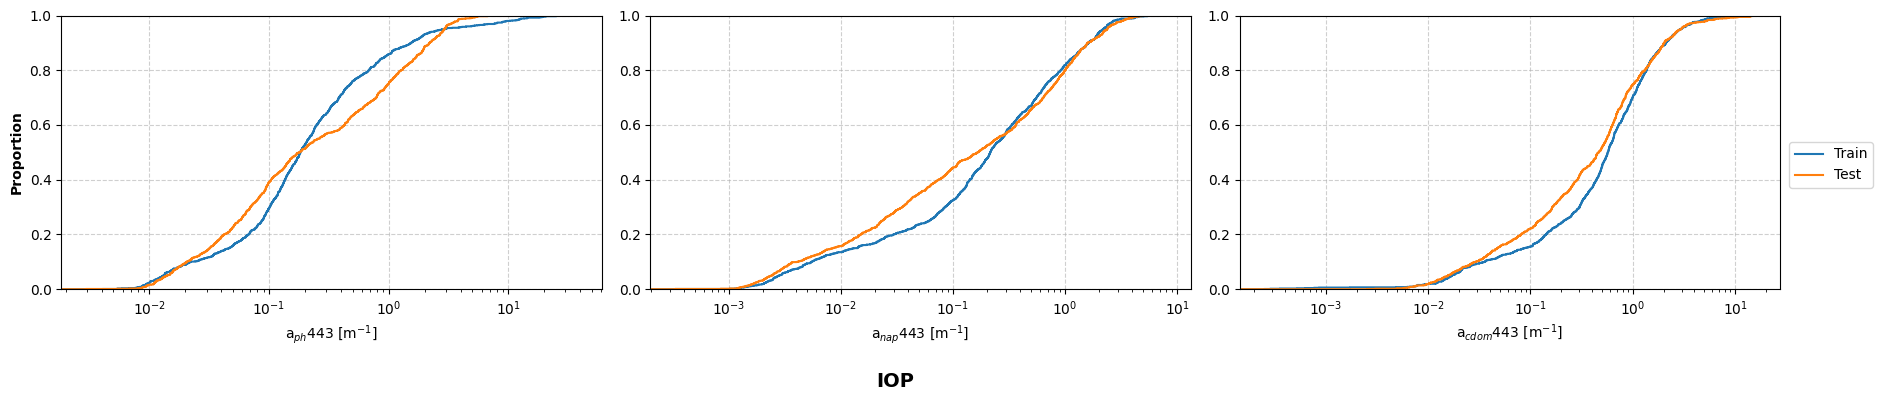

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cdf(train_set, test_set, columns, x_labels, figsize=(5, 3)):
    fig, axes = plt.subplots(1, len(columns), figsize=(figsize[0] * len(columns), figsize[1]))

    for idx, col in enumerate(columns):
        sns.ecdfplot(train_set[col], label="Train", ax=axes[idx])
        sns.ecdfplot(test_set[col], label="Test", ax=axes[idx])
        axes[idx].set_xlabel(x_labels[idx])
        axes[idx].set_xscale('log')  # Set log scale on x-axis
        if idx == 0:  # Set y-axis label for the first plot only
            axes[idx].set_ylabel('Proportion',fontweight='bold')
        else:
            axes[idx].set_ylabel('')

        axes[idx].grid(True, ls='--',alpha=0.6)  # Enable gridlines

    # Place one legend outside
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(1.02, 0.65), ncol=1)
    fig.supxlabel('IOP', fontsize=14, fontweight='bold')
    plt.tight_layout()
    #plt.savefig(r'C:\SwitchDrive\Data\Update_4\plots\wd_split.png',dpi=200,bbox_inches='tight')
    plt.show()

# Example usage
columns = ['aph_443', 'aNAP_443', 'aCDOM_443']
x_labels = [r'a$_{ph}$443 [m$^{-1}$]', r'a$_{nap}$443 [m$^{-1}$]', r'a$_{cdom}$443 [m$^{-1}$]']
plot_cdf(train_set_wd, test_set_wd, columns, x_labels, figsize=(6, 4))


In [119]:
cd C:\SwitchDrive\Data\final_datasets

C:\SwitchDrive\Data\final_datasets


In [120]:
train_set_wd.to_csv('wd_train_set_org.csv',index=False)
test_set_wd.to_csv('wd_test_set_org.csv',index=False)

## 3. out of distribution

In [22]:
def normalize(df):
    return (df - df.mean()) / df.std()

def dissimilarity_score(D1, D2):
    """Calculate the dissimilarity score between two datasets."""
    percentiles = [10, 20, 30, 40, 50, 60, 70, 80, 90]  # specify the percentiles to use
    score = 0
    for col in summary_cols:
        for percentile in percentiles:
            d1_percentile = np.percentile(D1[col], percentile)
            d2_percentile = np.percentile(D2[col], percentile)
            score += np.abs(d1_percentile - d2_percentile)
    return -score

def dissimilarity_objective(x, unique_lake_names, train_size, data):
    """Objective function for the optimization problem to maximize dissimilarity."""
    x_unique = np.unique(x.astype(int))
    train_lakes = unique_lake_names[x_unique]
    test_lakes = np.setdiff1d(unique_lake_names, train_lakes)

    D_train = data[data['lake_name'].isin(train_lakes)]
    D_test = data[data['lake_name'].isin(test_lakes)]

    balance_penalty = np.abs(len(D_train) - len(D_test))
    return dissimilarity_score(D_train, D_test) + balance_penalty


def progress_callback(xk, fk, *args):
    """Callback function to print progress during optimization."""
    global iteration
    global best_obj_val
    max_iterations = args[0]
    
    iteration += 1
    
    if fk < best_obj_val:
        best_obj_val = fk
        print(f"Objective function value at iteration {iteration}: {fk}")

    if iteration >= max_iterations:
        return True

iteration = 0
best_obj_val = float("inf")

def lake_data_split_oos(data, train_ratio=0.5, seed=12, max_iterations=15):
    np.random.seed(seed)
    unique_lake_names = data['lake_name'].unique()
    n_lakes = len(unique_lake_names)

    train_size = int(train_ratio * n_lakes)

    x0 = np.random.permutation(n_lakes)[:train_size]
    bounds = [(0, n_lakes - 1)] * train_size

    best_res = None
    best_obj_val = float("inf")

    for i in range(max_iterations):
        res = dual_annealing(dissimilarity_objective, bounds, x0=x0, args=(unique_lake_names, train_size, data), seed=seed, callback=progress_callback)
        if res.fun < best_obj_val:
            best_res = res
            best_obj_val = res.fun
        x0 = best_res.x.astype(int)

    x_unique = np.unique(x0)
    optimal_train_lakes = unique_lake_names[x_unique]
    optimal_test_lakes = np.setdiff1d(unique_lake_names, optimal_train_lakes)

    train_set = data[data['lake_name'].isin(optimal_train_lakes)]
    test_set = data[data['lake_name'].isin(optimal_test_lakes)]

    return train_set, test_set

summary_cols = ['aph_443', 'aNAP_443', 'aCDOM_443']
train_set_oos, test_set_oos = lake_data_split_oos(filtered_df, seed=42)

print(len(train_set_oos))
print(len(test_set_oos))


Objective function value at iteration 1: -2.466307189550565
Objective function value at iteration 2: -9.792693201081489
Objective function value at iteration 3: -10.7097079301922
Objective function value at iteration 4: -11.982438574500883
Objective function value at iteration 5: -13.330629658288922
Objective function value at iteration 6: -13.500708660788906
Objective function value at iteration 7: -13.520035629146253
Objective function value at iteration 8: -13.614666393306102
Objective function value at iteration 9: -14.98608799938686
Objective function value at iteration 10: -16.427024916292446
Objective function value at iteration 11: -16.510110606286773
Objective function value at iteration 12: -16.512892151937656
Objective function value at iteration 13: -16.51972042335329
Objective function value at iteration 14: -16.58626773447613
Objective function value at iteration 15: -16.666017377080756
1159
1160


In [19]:
unique_lake_names = check_lake_name_uniqueness(train_set_oos,test_set_oos)

NameError: name 'check_lake_name_uniqueness' is not defined

In [23]:
# summary_cols are the columns we are interested in.
summary_cols = ['aph_443', 'aNAP_443', 'aCDOM_443']

# Calculate descriptive statistics for the training set
train_stats = train_set_oos[summary_cols].describe()

# Calculate descriptive statistics for the test set
test_stats = test_set_oos[summary_cols].describe()

# Display the descriptive statistics
print("Training Set Statistics:")
print(train_stats)
print("\nTest Set Statistics:")
print(test_stats)

# Calculate the absolute difference between the two
abs_difference = abs(train_stats - test_stats)

# Calculate the relative difference between the two
relative_difference = abs_difference / train_stats

# Display the absolute and relative differences
print("\nAbsolute Difference in Statistics:")
print(abs_difference)
print("\nRelative Difference in Statistics:")
print(relative_difference)


Training Set Statistics:
           aph_443     aNAP_443    aCDOM_443
count  1159.000000  1159.000000  1159.000000
mean      0.289572     0.242219     0.528224
std       0.682801     0.533299     0.992019
min       0.004039     0.000330     0.000250
25%       0.035160     0.008845     0.052931
50%       0.092517     0.044071     0.199962
75%       0.234916     0.191640     0.577950
max      11.148375     4.529020    13.289179

Test Set Statistics:
           aph_443     aNAP_443    aCDOM_443
count  1160.000000  1160.000000  1160.000000
mean      1.303784     0.868272     1.279867
std       2.840326     0.927647     1.614344
min       0.002936     0.001135     0.003024
25%       0.151633     0.206460     0.491054
50%       0.424747     0.542543     0.851721
75%       1.491928     1.240495     1.495043
max      37.766944     8.012177    15.799130

Absolute Difference in Statistics:
         aph_443  aNAP_443  aCDOM_443
count   1.000000  1.000000   1.000000
mean    1.014212  0.626053   0.

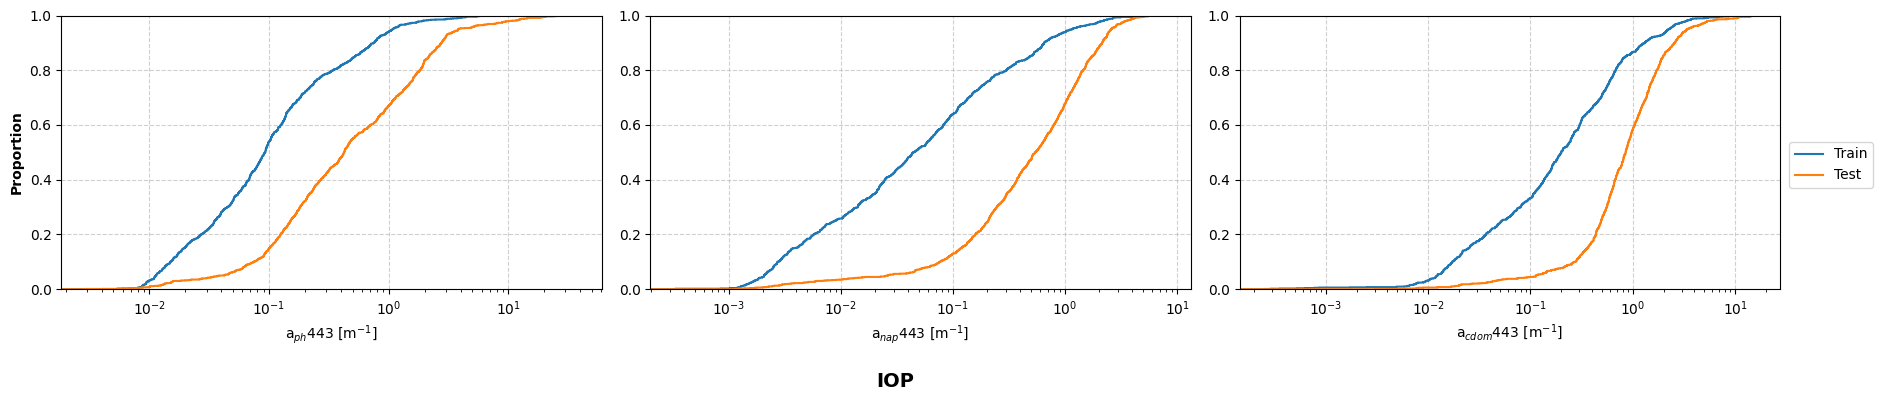

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cdf(train_set, test_set, columns, x_labels, figsize=(5, 3)):
    fig, axes = plt.subplots(1, len(columns), figsize=(figsize[0] * len(columns), figsize[1]))

    for idx, col in enumerate(columns):
        sns.ecdfplot(train_set[col], label="Train", ax=axes[idx])
        sns.ecdfplot(test_set[col], label="Test", ax=axes[idx])
        axes[idx].set_xlabel(x_labels[idx])
        axes[idx].set_xscale('log')  # Set log scale on x-axis
        if idx == 0:  # Set y-axis label for the first plot only
            axes[idx].set_ylabel('Proportion',fontweight='bold')
        else:
            axes[idx].set_ylabel('')

        axes[idx].grid(True, ls='--',alpha=0.6)  # Enable gridlines
    
    # Place one legend outside
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(1.02, 0.65), ncol=1)
    fig.supxlabel('IOP', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Example usage
columns = ['aph_443', 'aNAP_443', 'aCDOM_443']
x_labels = [r'a$_{ph}$443 [m$^{-1}$]', r'a$_{nap}$443 [m$^{-1}$]', r'a$_{cdom}$443 [m$^{-1}$]']
plot_cdf(train_set_oos, test_set_oos, columns, x_labels, figsize=(6, 4))
